In [1418]:
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1419]:
os.chdir('C:\\Users\\corne\\OneDrive\\Documents\\DS_Portfolio\\breast_cancer')
os.getcwd()

'C:\\Users\\corne\\OneDrive\\Documents\\DS_Portfolio\\breast_cancer'

# Data

## Importing

In [1420]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv',low_memory=False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [1421]:
df.columns[:31] #columns without gene and mutation info

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

(0.0, 100.0)

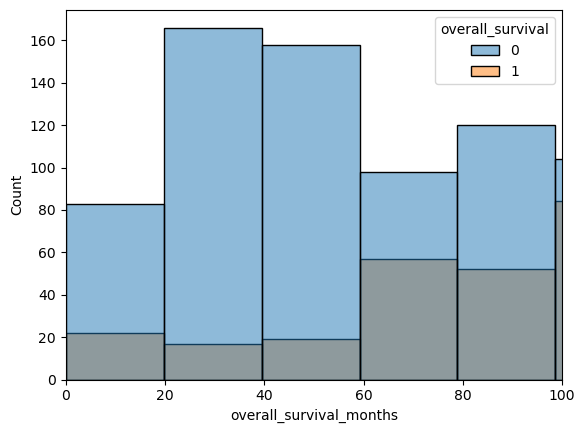

In [1422]:
sns.histplot(data=df, x='overall_survival_months',hue='overall_survival')
plt.xlim((0,100))

## Selecing data set

### Breast cancer vs. breast sarcoma 
Breast sarcoma is a rare form of breast cancer representing less than one percent of all cancers. Unlike most cancers that originate in the milk ducts, breast sarcomas begin in te connective tissue that supports the ducts and lobules of the breast. 

Text(0.5, 0, 'Cancer type')

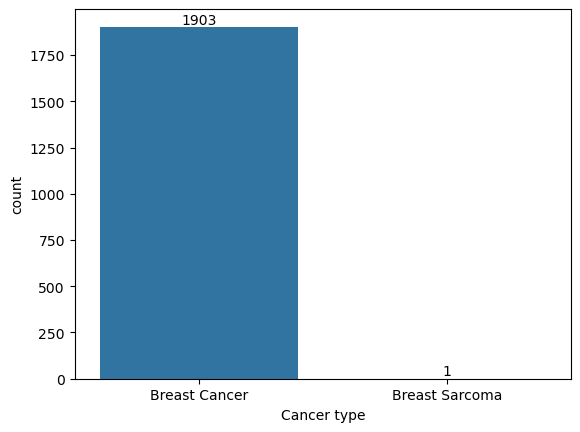

In [1423]:
ax = sns.countplot(data=df, x='cancer_type')
ax.bar_label(ax.containers[0])
plt.xlabel('Cancer type')

We will not consider the sole breast sarcoma case in this analysis.

In [1424]:
#delete instance of breast sarcoma, delete column
df=df[df['cancer_type']!='Breast Sarcoma']
df.pop('cancer_type');

### Stage of cancer 
| Stage | Description |
| ----- | ---------------------------------------|
| 0 | Abnormal cells present with the potential to become cancer. |
| 1 | Cancer is only in original location and has not spread into neighboring tissue. Surgery can normaly remove the entire tumor. |
| 2 - 3 | Cancer is larger and has grown into nearby tissue or lymph nodes. |
| 4 | Advanced/metastatic cancer that has spread to other organs. |


In [1425]:
#range of tumor stages
df = df.dropna(subset='tumor_stage')
set(df.tumor_stage.unique())

{0.0, 1.0, 2.0, 3.0, 4.0}

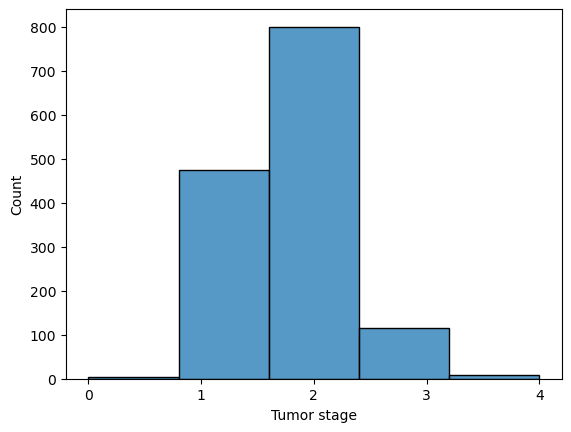

In [1426]:
#histplot
sns.histplot(data=df, x='tumor_stage', bins=5)
plt.xlabel('Tumor stage')
plt.xticks([0,1,2,3,4]);

We only consider stage 1 tumors that have not spread to lyph nodes in this analysis.

In [1427]:
#df = df[(df['tumor_stage']==1)&(df['lymph_nodes_examined_positive']==0)]
del df['lymph_nodes_examined_positive']

### Cause of death

In [1428]:
df.overall_survival.unique(),df.death_from_cancer.unique()

(array([1, 0], dtype=int64),
 array(['Living', 'Died of Disease', 'Died of Other Causes', nan],
       dtype=object))

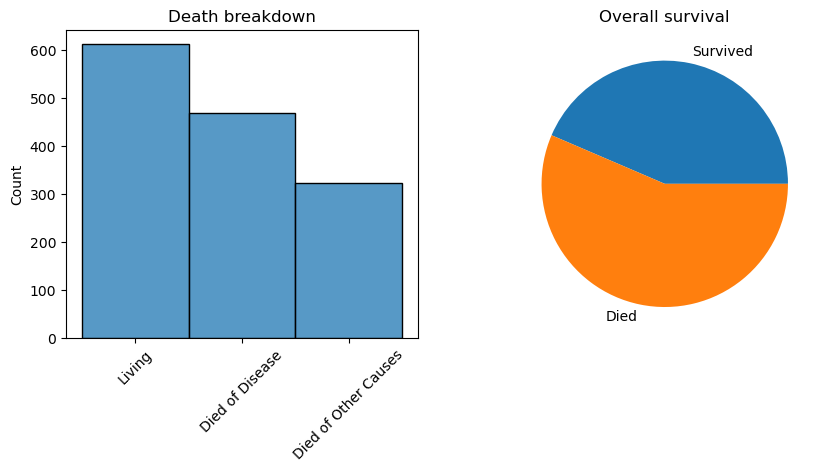

In [1429]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Death breakdown')
sns.histplot(data=df,x='death_from_cancer')
plt.xlabel('')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Overall survival')
plt.pie(((sum(df['overall_survival']),df.shape[0]-sum(df['overall_survival']))),labels=['Survived','Died']);

We will consider overall mortality only, so that all other causes of death not directly related to cancer, are counted equally. This is typical in cancer studies as the secondary cause of death is likely fatal due to the underlying presence of cancer.

In [1430]:
del df['death_from_cancer']

## EDA 

### Age

<Axes: xlabel='age_at_diagnosis', ylabel='Count'>

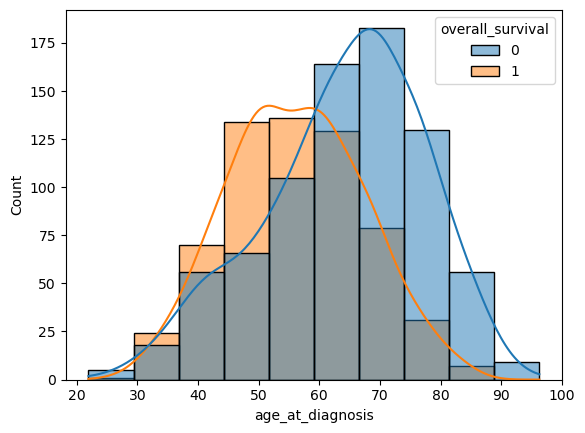

In [1431]:
sns.histplot(data=df, x='age_at_diagnosis',hue='overall_survival',kde=True, bins=10)

### Cancer sub-type

<Axes: xlabel='pr_status', ylabel='Count'>

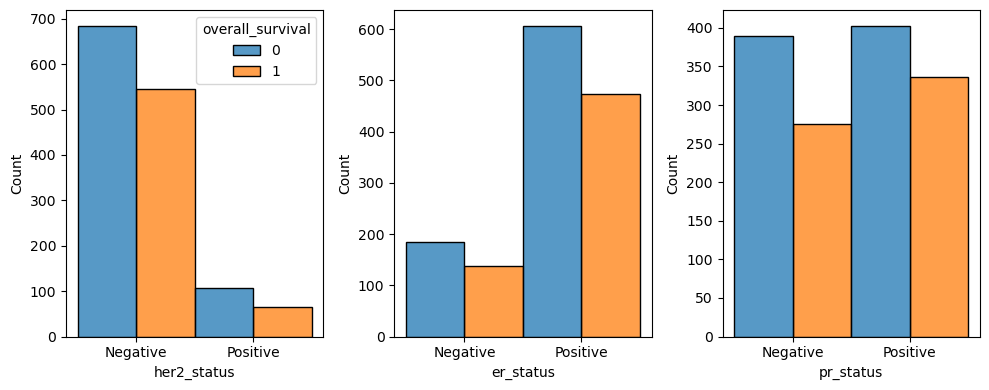

In [1432]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.histplot(data=df.sort_values('her2_status'), x='her2_status',hue='overall_survival',multiple='dodge')
plt.subplot(1,3,2)
sns.histplot(data=df.sort_values('er_status'), x='er_status', hue='overall_survival',multiple='dodge',legend=False)
plt.tight_layout()
plt.subplot(1,3,3)
sns.histplot(data=df.sort_values('pr_status'), x='pr_status', hue='overall_survival',multiple='dodge',legend=False)

<Axes: xlabel='pam50_+_claudin-low_subtype', ylabel='Count'>

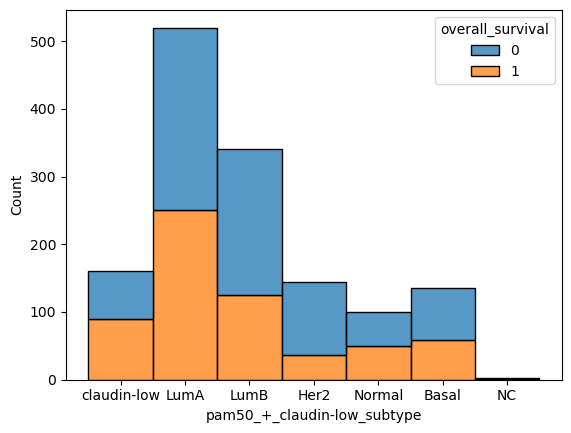

In [1433]:
sns.histplot(data=df, x='pam50_+_claudin-low_subtype', hue='overall_survival', multiple='stack')

### Cancer severity

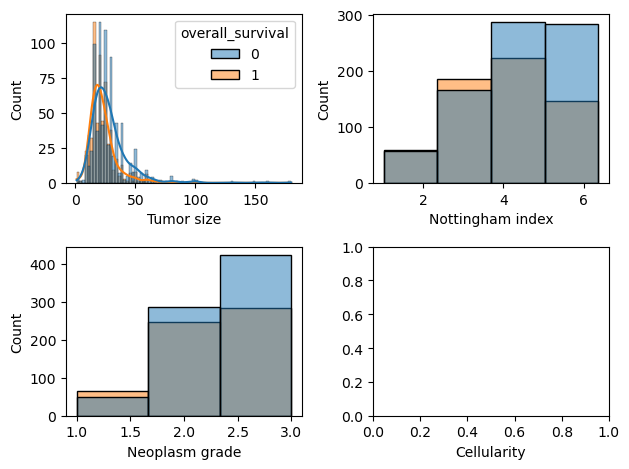

In [1434]:
plt.subplot(2,2,1)
sns.histplot(data=df, x='tumor_size',hue='overall_survival', kde=True)
#plt.xlim((0,50))
plt.xlabel('Tumor size')
plt.subplot(2,2,2)
sns.histplot(data=df, x='nottingham_prognostic_index',hue='overall_survival',bins=4,legend=False)
plt.xlabel('Nottingham index')
plt.subplot(2,2,3)
sns.histplot(data=df, x='neoplasm_histologic_grade',bins=3,hue='overall_survival',legend=False)
plt.xlabel('Neoplasm grade')
plt.subplot(2,2,4)
#sns.histplot(data=df, x='cellularity',hue='overall_survival',legend=False)
plt.xlabel('Cellularity')
plt.tight_layout()

### Feature correlation to patient mortality

In [1435]:
#encoding features
df = pd.get_dummies(df, columns=['type_of_breast_surgery','cancer_type_detailed','cellularity','pam50_+_claudin-low_subtype','er_status','cohort','er_status_measured_by_ihc','inferred_menopausal_state','integrative_cluster','primary_tumor_laterality','oncotree_code','pr_status','3-gene_classifier_subtype','her2_status_measured_by_snp6','her2_status','tumor_other_histologic_subtype'])
df.shape

(1403, 741)

In [1436]:
#replace mutant subtypes with wild time (0) or general mutant type (1)
for col in df.columns:
    if 'mut' in col:
        df[col]=np.where((df[col])!='0',1,0)

In [1437]:
from collections import Counter
for col in df:
    if '_mut' in col.lower():
        print(col)
    #df = df[col].where(df[col]!=0,1)
    #print(df[col].unique())

pik3ca_mut
tp53_mut
muc16_mut
ahnak2_mut
kmt2c_mut
syne1_mut
gata3_mut
map3k1_mut
ahnak_mut
dnah11_mut
cdh1_mut
dnah2_mut
kmt2d_mut
ush2a_mut
ryr2_mut
dnah5_mut
herc2_mut
pde4dip_mut
akap9_mut
tg_mut
birc6_mut
utrn_mut
tbx3_mut
col6a3_mut
arid1a_mut
lama2_mut
notch1_mut
cbfb_mut
ncor2_mut
col12a1_mut
col22a1_mut
pten_mut
akt1_mut
atr_mut
thada_mut
ncor1_mut
stab2_mut
myh9_mut
runx1_mut
nf1_mut
map2k4_mut
ros1_mut
lamb3_mut
arid1b_mut
erbb2_mut
sf3b1_mut
shank2_mut
ep300_mut
ptprd_mut
usp9x_mut
setd2_mut
setd1a_mut
thsd7a_mut
afdn_mut
erbb3_mut
rb1_mut
myo1a_mut
alk_mut
fanca_mut
adgra2_mut
ubr5_mut
pik3r1_mut
myo3a_mut
asxl2_mut
apc_mut
ctcf_mut
asxl1_mut
fancd2_mut
taf1_mut
kdm6a_mut
ctnna3_mut
brca1_mut
ptprm_mut
foxo3_mut
usp28_mut
gldc_mut
brca2_mut
cacna2d3_mut
arid2_mut
aff2_mut
lifr_mut
sbno1_mut
kdm3a_mut
ncoa3_mut
bap1_mut
l1cam_mut
pbrm1_mut
chd1_mut
jak1_mut
setdb1_mut
fam20c_mut
arid5b_mut
egfr_mut
map3k10_mut
smarcc2_mut
erbb4_mut
npnt_mut
nek1_mut
agmo_mut
zfp36l1_mut
sma

In [1438]:
#df=pd.get_dummies(df, columns = df.select_dtypes(include='object').columns.values)

In [1439]:
df.shape

(1403, 741)

In [1440]:
print('Top 15 features correlated with death:')
#df.corr(numeric_only=True)['overall_survival'].sort_values()[:15]

Top 15 features correlated with death:


In [1441]:
print('Top 10 features correlated with survival:')
#df.corr(numeric_only=True)['overall_survival'].sort_values(ascending=False)[:15]

Top 10 features correlated with survival:


In [1442]:
print(df.shape)
df.dropna()
df.shape

(1403, 741)


(1403, 741)

In [1443]:
#selecting features that will be scaled 
to_scale = [col for col in df if df[col].unique().shape[0] > 2]
not_scaled = [col for col in df if df[col].unique().shape[0] <= 2]

In [1444]:
df['3-gene_classifier_subtype_HER2+'].unique().shape

(2,)

In [1445]:
df['3-gene_classifier_subtype_HER2+']

0       0
1       0
2       0
3       0
4       0
       ..
1619    0
1621    0
1623    0
1628    0
1664    0
Name: 3-gene_classifier_subtype_HER2+, Length: 1403, dtype: uint8

In [1446]:
df['prr16']

0       0.6743
1      -0.1490
2      -0.5960
3      -0.2526
4       0.2641
         ...  
1619    0.1636
1621    2.5657
1623   -0.1486
1628    2.6534
1664   -1.3747
Name: prr16, Length: 1403, dtype: float64

In [1447]:
#normalizing features 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_names = df.columns.values
ct = ColumnTransformer(transformers=[
    ('rescaled',scaler,to_scale)],remainder='passthrough'
)
#df = pd.DataFrame(scaler.fit_transform(df[to_scale]), columns=to_scale)
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=col_names)

In [1448]:
'3-gene_classifier_subtype_HER2+' in df.columns

True

In [1449]:
df['3-gene_classifier_subtype_HER2+']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1398    0.0
1399    0.0
1400    0.0
1401    0.0
1402    0.0
Name: 3-gene_classifier_subtype_HER2+, Length: 1403, dtype: float64

In [1453]:
df['prr16'].describe()

count    1.403000e+03
mean     7.596679e-18
std      1.000357e+00
min     -2.348099e+00
25%     -5.424970e-01
50%     -1.334564e-01
75%      3.566642e-01
max      1.103840e+01
Name: prr16, dtype: float64

In [1451]:
df.describe()

,patient_id,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status_Negative,her2_status_Positive,tumor_other_histologic_subtype_Ductal/NST,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Metaplastic,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform
count,1403.000000,1.403000e+03,1.356000e+03,1.403000e+03,1.403000e+03,1.400000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,...,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,0.000000,7.191523e-16,-2.095996e-16,-4.152851e-16,8.103125e-17,-2.030122e-17,1.785220e-16,1.012891e-17,1.772558e-17,2.532226e-17,...,0.876693,0.123307,0.751960,0.071989,0.012830,0.000713,0.122594,0.012117,0.007128,0.014255
std,1.000357,1.000357e+00,1.000369e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,...,0.328907,0.328907,0.432029,0.258561,0.112579,0.026698,0.328088,0.109447,0.084154,0.118583
min,-1.492221,-2.978015e+00,-2.234165e+00,-2.663433e+00,-1.636299e+00,-1.668897e+00,-2.784040e+00,-2.444452e+00,-2.778052e+00,-3.793365e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.238293,-7.389750e-01,-6.805611e-01,-8.771733e-01,-8.442952e-01,-5.944330e-01,-1.193646e+00,-7.161475e-01,-6.905934e-01,-6.846708e-01,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.165598,4.101062e-02,8.730430e-01,9.683898e-04,-1.296751e-01,-2.586629e-01,3.967484e-01,-1.128555e-01,-5.575020e-02,-2.640985e-02,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.925471,7.154574e-01,8.730430e-01,8.826367e-01,7.850300e-01,2.785693e-01,3.967484e-01,5.495790e-01,6.185970e-01,6.604065e-01,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.539628,2.750353e+00,8.730430e-01,2.044676e+00,2.864333e+00,1.035167e+01,3.577537e+00,4.594895e+00,3.612464e+00,3.911262e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Genetic features of interest

In [1452]:
from sklearn.tree

SyntaxError: invalid syntax (1727581411.py, line 1)